# Bikeability usage (calculation of the bikeability index for a h3 grid)

<p> This is an example on how to calculate the bikeability index based on Hardinghaus et. al. 2020. </p>
<p>Boundaries of the city of Munich are downloaded, and from them, an H3 grid is created. The bikeability index is calculated for each grid part and visualized.</p>

### Step 1: import libraries and packages

In [1]:
import os
import sys
project_path = os.path.abspath('../')
sys.path.append(project_path)
from bikeability import bikeability
from bikeability import settings
import geopandas as gpd
import matplotlib.pyplot as plt
from bikeability import grid
import osmnx as ox
from pathlib import Path



### Step 2a: download the boundaries of your region of interest (ROI). In this example it is the city of Munich

<Axes: >

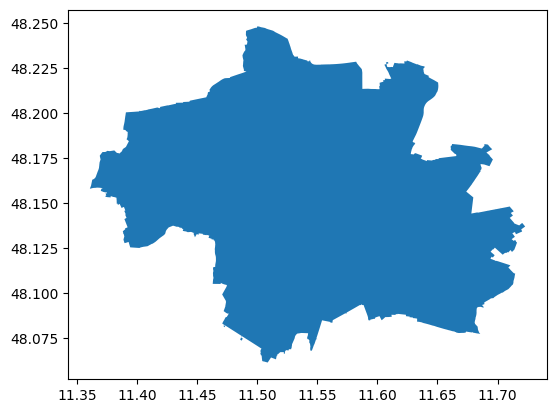

In [9]:
roi = 'münchen'
query = [roi, 1]

munich_boundaries = ox.geocoder.geocode_to_gdf(query[0], which_result=query[1])
munich_boundaries = munich_boundaries.explode(index_parts=True).iloc[:1]
munich_boundaries.plot()

### Step 2b: generation of a h3 grid in resolution 9

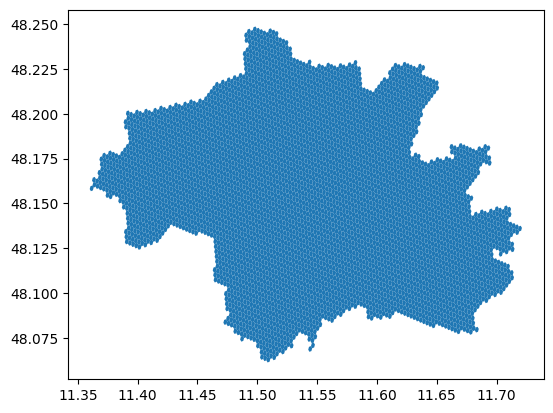

In [3]:
id_column = 'h3_id'

h3_munich = grid.create_h3_grid(munich_boundaries, res=9)
h3_munich.plot()
h3_munich = h3_munich.reset_index(names=id_column)
plt.show()

### Step 3: setup parameters

In [4]:
id_column = 'h3_id'
download = True
store_tmp_files = True
verbose = 1
agg_table = h3_munich[[id_column, 'geometry']]

### Step 4: calculate the bikeability index (this step may take a while)

In [5]:
bikeability_gdf = bikeability.calc_bikeability(id_column, agg_table, download=download, verbose=verbose, store_tmp_files=store_tmp_files)

Generating bikeability indicator

downloading street network and additional data from osm

downloading green spaces from osm

downloading bike shops from osm

all necessary data has been downloaded

calculating share of cycling infrastructure

calculating share of small streets

calculating green share

calculating node density

calculating shop density calculated

bikeability values have been calculated for 5318 geometries


### Step 5: plot a choropleth map of the bikeability index

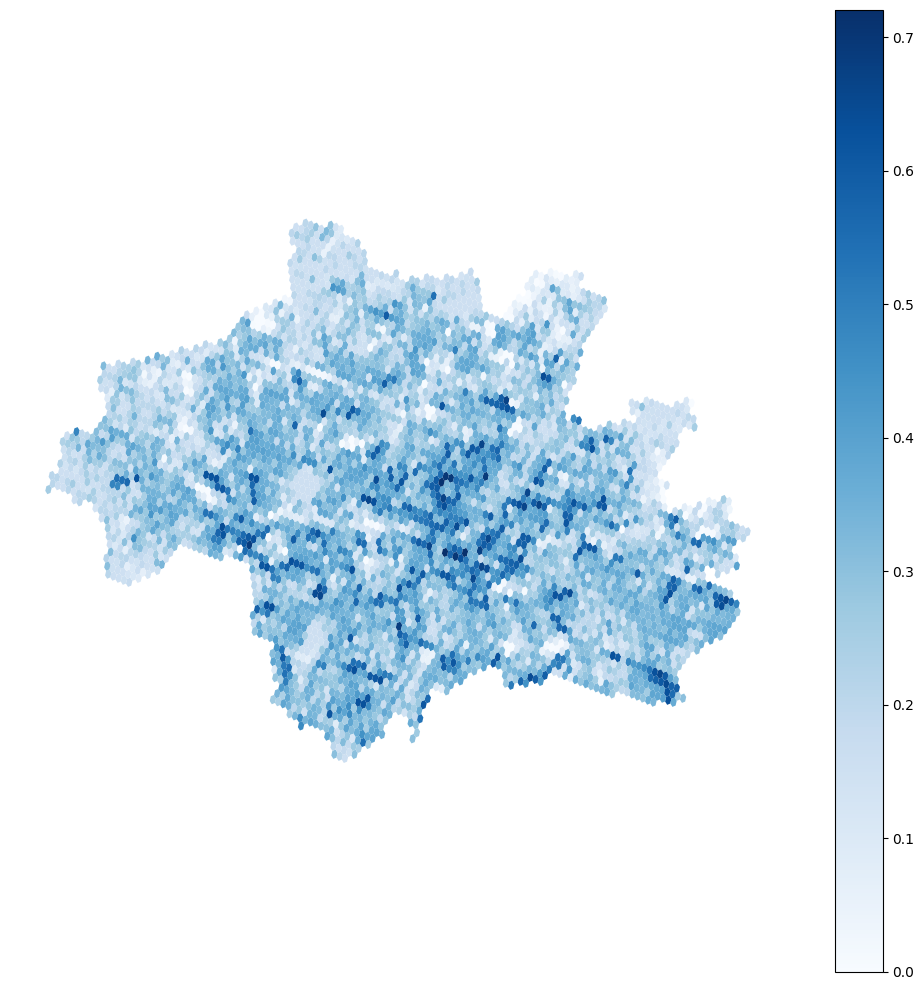

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
bikeability_gdf.plot(column= 'bikeability', ax=ax, cmap='Blues', legend=True)
ax.axis('off')
plt.tight_layout()
#plt.savefig(f"{roi}_bikeability_map.png", dpi=300)
plt.show()

### Step 6: save results

In [21]:
output_folder_path = os.path.join(project_path, 'output')
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)
    print(f"Output folder created at: {output_folder_path}")
else:
    print(f"Output folder already exists at: {output_folder_path}")

Output folder already exists at: C:\Users\lope_m0\PycharmProjects\bikeability-examples\output


In [22]:
print(bikeability_gdf.crs)
bikeability_gdf_reprojected = bikeability_gdf.to_crs(25832)
print(bikeability_gdf_reprojected.crs)

EPSG:32632
EPSG:25832


In [25]:
output_path = os.path.join(output_folder_path, f"{roi}_bikeability_map.shp")
bikeability_gdf_reprojected.to_file(output_path, crs='EPSG:25832')

C:\Users\lope_m0\AppData\Local\Temp\ipykernel_8932\3612211852.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bikeability_gdf_reprojected.to_file(output_path, crs='EPSG:25832')


In [26]:
bikeability_gdf_csv = bikeability_gdf_reprojected.copy()
bikeability_gdf_csv['geometry'] = bikeability_gdf_csv['geometry'].apply(lambda geom: geom.wkt)
output_path = os.path.join(output_folder_path, f"{roi}_bikeability_values.csv")
bikeability_gdf_csv.to_csv(output_path, index=False)

C:\Users\lope_m0\AppData\Local\Temp\ipykernel_8932\3102817074.py:2: UserWarning: Geometry column does not contain geometry.
  bikeability_gdf_csv['geometry'] = bikeability_gdf_csv['geometry'].apply(lambda geom: geom.wkt)
